In [178]:
import glob
import pandas as pd
import numpy as np

import os
import re

In [179]:
attack = "crownibp"

In [180]:
results_folder = rf"results\{attack}"

In [181]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]
exclude_datasets = ["Dialysis","divorce","Pbc3","vlbw"]

In [244]:
# CI , IBS , NegLL
metric = "NegLL"

In [245]:
ascending = False if metric=="CI" else True

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{metric}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [246]:
len(excels)/(len(algorithms)-1)

10.0

In [247]:
df = pd.DataFrame()
N_datasets = len(excels)
percentage_change = []
# print(excels)
for excel_i in excels:

    temp_df = pd.read_excel(excel_i)
    folder_name,dataset_name = excel_i.split("\\")[-3:-1]
    print(folder_name,dataset_name)
    
    temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
    col_name = (dataset_name,re.sub("results_","",folder_name))
    df[col_name] = temp_df[f"Robust {metric}"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)

    col_name = (dataset_name,"baseline")
    df[col_name] = temp_df[f"Non Robust {metric}"]

df.index = temp_df.eps

results_crownibp Aids2
results_crownibp dataDIVAT1
results_crownibp flchain
results_crownibp Framingham
results_crownibp LeukSurv
results_crownibp prostate
results_crownibp retinopathy
results_crownibp stagec
results_crownibp TRACE
results_crownibp zinc
results_fgsm Aids2
results_fgsm dataDIVAT1
results_fgsm flchain
results_fgsm Framingham
results_fgsm LeukSurv
results_fgsm prostate
results_fgsm retinopathy
results_fgsm stagec
results_fgsm TRACE
results_fgsm zinc
results_noise Aids2
results_noise dataDIVAT1
results_noise flchain
results_noise Framingham
results_noise LeukSurv
results_noise prostate
results_noise retinopathy
results_noise stagec
results_noise TRACE
results_noise zinc
results_pgd Aids2
results_pgd dataDIVAT1
results_pgd flchain
results_pgd Framingham
results_pgd LeukSurv
results_pgd prostate
results_pgd retinopathy
results_pgd stagec
results_pgd TRACE
results_pgd zinc


In [248]:
micolumns = pd.MultiIndex.from_tuples(df.columns)
dfmi = (
    pd.DataFrame(
        df.values,
        index=df.index,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)

dfmi.sort_values(by="eps",ascending=False,inplace=True)
dfmi = dfmi.reindex(columns=algorithms, level=1)


In [249]:
dfmi[dfmi==''] = np.NaN
dfmi = dfmi.astype(float)
dfmi

Aids2                                                         \
         baseline          noise          fgsm           pgd    crownibp   
eps                                                                        
1.00  8859.354492  147831.093750  58588.773438  42150.023438  589.428650   
0.90  6033.809570   71771.851562  31103.109375  23003.537109  578.846863   
0.80  4020.197998   34629.847656  16505.087891  12519.989258  572.072021   
0.70  2666.342529   16415.355469   8622.822266   6726.468262  567.923218   
0.60  1778.499390    7765.859375   4465.530762   3587.943848  565.120850   
0.50  1219.547607    3625.560547   2311.294922   1945.680298  563.325195   
0.40   877.496094    1733.784546   1242.331177   1108.845459  562.151672   
0.30   685.623291     926.220093    762.159363    723.726074  561.235535   
0.20   596.005920     638.804138    597.549805    590.382568  560.596924   
0.10   564.843262     568.889954    561.803406    560.811523  560.114746   
0.05   560.671997     561.788696    559.086243    558.488525  559.943970   
0.00   559.407288     559.412964    558.208374    557.795410  559.807007   

         Framingham                                                         \
           baseline         noise          fgsm           pgd     crownibp   
eps                                                                          
1.00  412297.625000  7.170035e+06  1.175932e+09  2.847273e+11  1689.085205   
0.90  171566.031250  2.023518e+06  1.430989e+08  1.496129e+10  1643.057983   
0.80   72114.828125  5.729281e+05  1.750779e+07  8.097850e+08  1605.842896   
0.70   30589.742188  1.639349e+05  2.198922e+06  4.622308e+07  1574.997437   
0.60   13236.878906  4.773521e+04  2.913698e+05  2.820937e+06  1549.995728   
0.50    6102.250000  1.456983e+04  4.239369e+04  1.954670e+05  1529.750977   
0.40    3228.449951  5.158362e+03  7.810763e+03  1.819080e+04  1513.738892   
0.30    2112.774658  2.528332e+03  2.559521e+03  3.344857e+03  1501.556396   
0.20    1689.150879  1.781412e+03  1.677940e+03  1.727210e+03  1492.774658   
0.10    1536.002930  1.563476e+03  1.526256e+03  1.525092e+03  1487.099976   
0.05    1506.588989  1.523724e+03  1.507120e+03  1.508329e+03  1485.324463   
0.00    1496.340942  1.506730e+03  1.498951e+03  1.503487e+03  1484.209229   

      ...        stagec                                             \
      ...      baseline         noise           fgsm           pgd   
eps   ...                                                            
1.00  ...  10722.169922  2.085759e+06  459994.406250  86997.164062   
0.90  ...   4542.788086  4.539600e+05  111855.859375  27638.734375   
0.80  ...   2072.657227  1.028563e+05   29970.570312   9100.213867   
0.70  ...    956.157104  2.301129e+04    8332.564453   3154.617920   
0.60  ...    452.361267  5.819060e+03    2170.573242   1098.134033   
0.50  ...    220.045502  1.564932e+03     661.363403    397.288971   
0.40  ...    114.308990  4.566017e+02     222.769852    157.512833   
0.30  ...     66.890907  1.515377e+02      89.642845     74.488091   
0.20  ...     46.680031  6.714256e+01      51.809132     47.547382   
0.10  ...     38.895000  4.377835e+01      42.895508     40.080566   
0.05  ...     37.011444  3.966553e+01      41.874397     39.127701   
0.00  ...     35.851711  3.759151e+01      41.626263     38.838802   

                          zinc                                             \
        crownibp      baseline         noise           fgsm           pgd   
eps                                                                         
1.00  497.905518  3.174052e+06  2.390235e+12  875219.875000  5.390504e+08   
0.90  298.506470  6.954024e+05  6.958951e+10  205746.937500  5.494724e+07   
0.80  185.637177  1.519375e+05  2.350793e+09   45203.554688  5.878245e+06   
0.70  120.915710  3.434470e+04  9.149251e+07   11287.107422  6.536374e+05   
0.60   84.456421  7.946986e+03  4.369735e+06    2873.625244  7.538958e+04   
0.50   64.011681  1.909294e+03  2

In [250]:
# dfmi.T.groupby(axis=0,level=0).rank(axis=0,na_option='bottom',method="average",ascending=ascending)

In [251]:
# for i,sub_df in dfmi.groupby(level=0,axis=1):
#     print(sub_df,sub_df.columns)
#     print(sub_df.rank(axis=1,ascending=ascending))



In [252]:
dfmi.applymap(np.isnan).sum().sum()

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\3478686788.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmi.applymap(np.isnan).sum().sum()


0

In [253]:
best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=1,na_option='bottom',method="average",ascending=ascending)
best_per_dataset_rank

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\1243889888.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=1,na_option='bottom',method="average",ascending=ascending)
C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\1243889888.py:1: FutureWarning: DataFrameGroupBy.rank with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=1,na_option='bottom',method="average",ascending=ascending)


Aids2                          Framingham                           \
     baseline noise fgsm  pgd crownibp   baseline noise fgsm  pgd crownibp   
eps                                                                          
1.00      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.90      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.80      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.70      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.60      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.50      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.40      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.30      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.20      3.0   5.0  4.0  2.0      1.0        3.0   5.0  2.0  4.0      1.0   
0.10      4.0   5.0  3.0  2.0      1.0        4.0   5.0  3.0  2.0      1.0   
0.05      4.0   5.0  2.0  1.0      3.0        2.0   5.0  3.0  4.0      1.0   
0.00      3.0   4.0  2.0  1.0      5.0        2.0   5.0  3.0  4.0      1.0   

      ...   stagec                              zinc                           
      ... baseline noise fgsm  pgd crownibp baseline noise fgsm  pgd crownibp  
eps   ...                                                                      
1.00  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.90  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.80  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.70  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.60  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.50  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.40  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.30  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.20  ...      2.0   5.0  4.0  3.0      1.0      4.0   5.0  2.0  3.0      1.0  
0.10  ...      2.0   5.0  4.0  3.0      1.0      3.0   5.0  2.0  4.0      1.0  
0.05  ...      2.0   4.0  5.0  3.0      1.0      1.0   5.0  3.0  4.0      2.0  
0.00  ...      2.0   3.0  5.0  4.0      1.0      1.0   5.0  3.0  4.0      2.0  

[12 rows x 50 columns]

In [254]:
# best_per_dataset_rank.stack(1)

In [255]:
best_per_dataset_avg_rank = best_per_dataset_rank.stack(level=1).mean(1).unstack(1).sort_values(by="eps",ascending=False)
best_per_dataset_avg_rank

baseline  noise  fgsm  pgd  crownibp
eps                                       
1.00       2.5    4.6   3.3  3.6       1.0
0.90       2.5    4.6   3.3  3.6       1.0
0.80       2.5    4.6   3.3  3.6       1.0
0.70       2.5    4.6   3.3  3.6       1.0
0.60       2.5    4.6   3.3  3.6       1.0
0.50       2.5    4.7   3.3  3.5       1.0
0.40       2.5    4.7   3.3  3.5       1.0
0.30       2.6    4.7   3.5  3.2       1.0
0.20       3.2    4.9   3.1  2.8       1.0
0.10       3.2    5.0   2.9  2.5       1.4
0.05       2.1    4.8   3.3  2.8       2.0
0.00       1.9    4.5   3.3  3.0       2.3

In [256]:
if not ascending:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
else:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
best_per_dataset.applymap(lambda x: x[1])

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\1722459016.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\1722459016.py:4: FutureWarning: DataFrameGroupBy.idxmin with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\1722459016.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1])


Aids2 Framingham  LeukSurv     TRACE dataDIVAT1   flchain  prostate  \
eps                                                                            
1.00  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.90  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.80  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.70  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.60  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.50  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.40  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.30  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.20  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.10  crownibp   crownibp  crownibp       pgd   crownibp  crownibp  crownibp   
0.05       pgd   crownibp  crownibp  baseline   crownibp       pgd  crownibp   
0.00       pgd   crownibp  crownibp  baseline   crownibp       pgd  crownibp   

     retinopathy    stagec      zinc  
eps                                   
1.00    crownibp  crownibp  crownibp  
0.90    crownibp  crownibp  crownibp  
0.80    crownibp  crownibp  crownibp  
0.70    crownibp  crownibp  crownibp  
0.60    crownibp  crownibp  crownibp  
0.50    crownibp  crownibp  crownibp  
0.40    crownibp  crownibp  crownibp  
0.30    crownibp  crownibp  crownibp  
0.20    crownibp  crownibp  crownibp  
0.10        fgsm  crownibp  crownibp  
0.05    baseline  crownibp  baseline  
0.00    baseline  crownibp  baseline

In [257]:
if metric != "NegLL":
     # aggregate all the CI files
    os.listdir(results_folder)
    excels = []
    for folder in os.listdir(results_folder):
        glob_search = os.path.join(results_folder,folder,f"{metric}_all.xlsx")
        excels.extend(glob.glob(glob_search))
        
    df = pd.DataFrame()
    N_datasets = len(excels)
    percentage_change = []
    for excel_i in excels:
    
        temp_df = pd.read_excel(excel_i)
        folder_name = excel_i.split("\\")[-2]
        temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
        col_name = re.sub("results_","",folder_name)
        df[col_name] = temp_df["%"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)
    
    df.index = temp_df.eps
    df = df.reindex(columns=algorithms[1:], level=1)

In [258]:
df

(Aids2, crownibp)  (Aids2, baseline)  (dataDIVAT1, crownibp)  \
eps                                                                  
1.00         589.428650        8859.354492              784.191650   
0.90         578.846863        6033.809570              771.602905   
0.80         572.072021        4020.197998              762.105957   
0.70         567.923218        2666.342529              755.619263   
0.60         565.120850        1778.499390              751.644043   
0.50         563.325195        1219.547607              749.460632   
0.40         562.151672         877.496094              748.720581   
0.30         561.235535         685.623291              748.350525   
0.20         560.596924         596.005920              748.367981   
0.10         560.114746         564.843262              748.710022   
0.05         559.943970         560.671997              749.001099   
0.00         559.807007         559.407288              749.372742   

      (dataDIVAT1, baseline)  (flchain, crownibp)  (flchain, baseline)  \
eps                                                                      
1.00            1.911071e+07          2832.669189         4.530156e+23   
0.90            4.123375e+06          2104.657227         1.196849e+21   
0.80            9.019360e+05          1713.748047         3.294726e+18   
0.70            2.007240e+05          1478.277100         9.317734e+15   
0.60            4.558924e+04          1277.031860         2.745715e+13   
0.50            1.080300e+04          1203.161499         8.385244e+10   
0.40            2.994026e+03          1171.604492         2.701699e+08   
0.30            1.237482e+03          1149.181641         1.014280e+06   
0.20            8.466285e+02          1133.113647         1.572635e+04   
0.10            7.661107e+02          1121.419800         1.987659e+03   
0.05            7.571978e+02          1116.594727         1.272716e+03   
0.00            7.560872e+02          1112.357300         1.111867e+03   

      (Framingham, crownibp)  (Framingham, baseline)  (LeukSurv, crownibp)  \
eps                                                                          
1.00             1689.085205           412297.625000           8157.029297   
0.90             1643.057983           171566.031250           3518.931152   
0.80             1605.842896            72114.828125           1558.174927   
0.70             1574.997437            30589.742188            716.359741   
0.60             1549.995728            13236.878906            360.191895   
0.50             1529.750977             6102.250000            283.778564   
0.40             1513.738892             3228.449951            265.588806   
0.30             1501.556396             2112.774658            254.311035   
0.20             1492.774658             1689.150879            246.232605   
0.10             1487.099976             1536.002930            241.496521   
0.05             1485.324463             1506.588989            239.999741   
0.00             1484.209229             1496.340942            238.957703   

      (LeukSurv, baseline)  ...  (Aids2, pgd)  (dataDIVAT1, pgd)  \
eps                         ...                                    
1.00          4.997463e+06  ...  42150.023438       2.036829e+10   
0.90          1.580250e+06  ...  23003.537109       1.326868e+09   
0.80          4.846164e+05  ...  12519.989258       8.956166e+07   
0.70          1.539150e+05  ...   6726.468262       6.537061e+06   
0.60          4.829570e+04  ...   3587.943848       4.870834e+05   
0.50          1.492171e+04  ...   1945.680298       4.104145e+04   
0.40          4.600667e+03  ...   1108.845459       4.802048e+03   
0.30          1.408840e+03  ...    723.726074       1.255672e+03   
0.20          5.309224e+02  ...    590.382568       8.167650e+02   
0.10          3.210077e+02  ...    560.811523       7.627328e+02   
0.05          2.865688e+02  ...    558.488525       7.595930e+02   
0.00       

In [259]:
excel_name = os.path.join(results_folder,f"{metric}_all.xlsx")
with pd.ExcelWriter(excel_name) as writer:  
    dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
    best_per_dataset_rank.to_excel(writer,sheet_name="rank")
    best_per_dataset_avg_rank.to_excel(writer,sheet_name="average_rank")
    best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")
    df.to_excel(writer,sheet_name="%")

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\229516633.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\229516633.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")


In [260]:
best_per_dataset_avg_rank.index = ["{:.2f}".format(float(x)) for x in np.round(best_per_dataset_avg_rank.index.tolist(),2)]
best_per_dataset_avg_rank.index.name = r"$\epsilon$"
print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))

\begin{tabular}{llllll}
\toprule
 & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  \\
\midrule
1.00 & 2.5 & 4.6 & 3.3 & 3.6 & 1.0 \\
0.90 & 2.5 & 4.6 & 3.3 & 3.6 & 1.0 \\
0.80 & 2.5 & 4.6 & 3.3 & 3.6 & 1.0 \\
0.70 & 2.5 & 4.6 & 3.3 & 3.6 & 1.0 \\
0.60 & 2.5 & 4.6 & 3.3 & 3.6 & 1.0 \\
0.50 & 2.5 & 4.7 & 3.3 & 3.5 & 1.0 \\
0.40 & 2.5 & 4.7 & 3.3 & 3.5 & 1.0 \\
0.30 & 2.6 & 4.7 & 3.5 & 3.2 & 1.0 \\
0.20 & 3.2 & 4.9 & 3.1 & 2.8 & 1.0 \\
0.10 & 3.2 & 5.0 & 2.9 & 2.5 & 1.4 \\
0.05 & 2.1 & 4.8 & 3.3 & 2.8 & 2.0 \\
0.00 & 1.9 & 4.5 & 3.3 & 3.0 & 2.3 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\3581541270.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))


In [261]:
if metric == "NegLL":
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))
else:
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(str).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllllllllllllllllllllllllllllllllllllllllllll}
\toprule
 & \multicolumn{5}{c}{Aids2} & \multicolumn{5}{c}{Framingham} & \multicolumn{5}{c}{LeukSurv} & \multicolumn{5}{c}{TRACE} & \multicolumn{5}{c}{dataDIVAT1} & \multicolumn{5}{c}{flchain} & \multicolumn{5}{c}{prostate} & \multicolumn{5}{c}{retinopathy} & \multicolumn{5}{c}{stagec} & \multicolumn{5}{c}{zinc} \\
 & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
1.00 & 

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\718377934.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))


In [262]:
dataset_names = np.array(list(map(np.array,dfmi.columns)))[:,0]

In [263]:
dataset_names

array(['Aids2', 'Aids2', 'Aids2', 'Aids2', 'Aids2', 'Framingham',
       'Framingham', 'Framingham', 'Framingham', 'Framingham', 'LeukSurv',
       'LeukSurv', 'LeukSurv', 'LeukSurv', 'LeukSurv', 'TRACE', 'TRACE',
       'TRACE', 'TRACE', 'TRACE', 'dataDIVAT1', 'dataDIVAT1',
       'dataDIVAT1', 'dataDIVAT1', 'dataDIVAT1', 'flchain', 'flchain',
       'flchain', 'flchain', 'flchain', 'prostate', 'prostate',
       'prostate', 'prostate', 'prostate', 'retinopathy', 'retinopathy',
       'retinopathy', 'retinopathy', 'retinopathy', 'stagec', 'stagec',
       'stagec', 'stagec', 'stagec', 'zinc', 'zinc', 'zinc', 'zinc',
       'zinc'], dtype='<U11')

## LONG TABLE

In [264]:
dfmi.T

$\epsilon$                    1.00          0.90          0.80          0.70  \
Aids2       baseline  8.859354e+03  6.033810e+03  4.020198e+03  2.666343e+03   
            noise     1.478311e+05  7.177185e+04  3.462985e+04  1.641536e+04   
            fgsm      5.858877e+04  3.110311e+04  1.650509e+04  8.622822e+03   
            pgd       4.215002e+04  2.300354e+04  1.251999e+04  6.726468e+03   
            crownibp  5.894286e+02  5.788469e+02  5.720720e+02  5.679232e+02   
Framingham  baseline  4.122976e+05  1.715660e+05  7.211483e+04  3.058974e+04   
            noise     7.170035e+06  2.023518e+06  5.729281e+05  1.639349e+05   
            fgsm      1.175932e+09  1.430989e+08  1.750779e+07  2.198922e+06   
            pgd       2.847273e+11  1.496129e+10  8.097850e+08  4.622308e+07   
            crownibp  1.689085e+03  1.643058e+03  1.605843e+03  1.574997e+03   
LeukSurv    baseline  4.997463e+06  1.580250e+06  4.846164e+05  1.539150e+05   
            noise     1.433513e+23  4.869469e+20  1.609030e+18  5.569824e+15   
            fgsm      1.058910e+16  2.304182e+14  5.043808e+12  1.152872e+11   
            pgd       3.669960e+14  1.127537e+13  3.759158e+11  1.217064e+10   
            crownibp  8.157029e+03  3.518931e+03  1.558175e+03  7.163597e+02   
TRACE       baseline  6.314547e+04  3.010717e+04  1.439921e+04  6.926705e+03   
            noise     9.677259e+08  1.184623e+08  1.483096e+07  1.890801e+06   
            fgsm      9.655760e+06  1.975090e+06  4.176620e+05  8.983463e+04   
            pgd       2.002721e+07  3.630950e+06  6.663684e+05  1.269699e+05   
            crownibp  1.236366e+03  8.965582e+02  6.971425e+02  6.222901e+02   
dataDIVAT1  baseline  1.911071e+07  4.123375e+06  9.019360e+05  2.007240e+05   
            noise     2.839112e+09  3.060612e+08  3.323151e+07  3.763682e+06   
            fgsm      1.228658e+09  1.332899e+08  1.471676e+07  1.666898e+06   
            pgd       2.036829e+10  1.326868e+09  8.956166e+07  6.537061e+06   
            crownibp  7.841917e+02  7.716029e+02  7.621060e+02  7.556193e+02   
flchain     baseline  4.530156e+23  1.196849e+21  3.294726e+18  9.317734e+15   
            noise     1.656467e+36  6.186568e+31  3.740651e+27  2.315601e+23   
            fgsm      2.455638e+21  2.985282e+18  4.054576e+15  6.050609e+12   
            pgd       5.619882e+14  4.588008e+12  4.042044e+10  4.519013e+08   
            crownibp  2.832669e+03  2.104657e+03  1.713748e+03  1.478277e+03   
prostate    baseline  1.107170e+06  3.477602e+05  1.103729e+05  3.487767e+04   
            noise     1.291205e+10  1.291410e+09  1.510213e+08  1.802926e+07   
            fgsm      4.386080e+08  6.945126e+07  1.001323e+07  1.587152e+06   
            pgd       7.426603e+24  1.182596e+22  1.884250e+19  3.025433e+16   
            crownibp  4.725147e+02  4.340988e+02  4.046450e+02  3.822469e+02   
retinopathy baseline  9.045977e+03  4.727151e+03  2.516474e+03  1.373095e+03   
            noise     1.368677e+04  6.707534e+03  3.334468e+03  1.698674e+03   
            fgsm      6.734936e+03  3.517202e+03  1.898777e+03  1.035343e+03   
            pgd       5.383099e+03  2.906233e+03  1.592203e+03  8.886577e+02   
            crownibp  4.553193e+02  3.687382e+02  3.054284e+02  2.594506e+02   
stagec      baseline  1.072217e+04  4.542788e+03  2.072657e+03  9.561571e+02   
            noise     2.085759e+06  4.539600e+05  1.028563e+05  2.301129e+04   
            fgsm      4.599944e+05  1.118559e+05  2.997057e+04  8.332564e+03   
            pgd       8.699716e+04  2.763873e+04  9.100214e+03  3.154618e+03   
            crownibp  4.979055e+02  2.985065e+02  1.856372e+02  1.209157e+02   
zinc        baseline  3.174052e+06  6.954024e+05  1.519375e+05  3.434470e+04   
            noise     2.390235e+12  6.958951e+10  2.350793e+09  9.149251e+07   
            fgsm      8.752199e+05  2.057469e+05  4.520355e+04  1.128711e+04   
            pgd       5.390504e+08  5.494724e+07  5.878245e+06  6.536374e+05   


In [265]:
if metric == "NegLL":
    print(dfmi.T.applymap(lambda x: str(np.round(x,3))).applymap(lambda x: "{:.2e}".format(float(x))).to_latex(index=True,multicolumn_format="c"))
else:
    print(dfmi.T.applymap(lambda x: str(np.round(x,3))).to_latex(index=True,multicolumn_format="c"))

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\2645064119.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.applymap(lambda x: str(np.round(x,3))).applymap(lambda x: "{:.2e}".format(float(x))).to_latex(index=True,multicolumn_format="c"))


\begin{tabular}{llllllllllllll}
\toprule
 & $\epsilon$ & 1.00 & 0.90 & 0.80 & 0.70 & 0.60 & 0.50 & 0.40 & 0.30 & 0.20 & 0.10 & 0.05 & 0.00 \\
\midrule
\multirow[t]{5}{*}{Aids2} & baseline & 8.86e+03 & 6.03e+03 & 4.02e+03 & 2.67e+03 & 1.78e+03 & 1.22e+03 & 8.77e+02 & 6.86e+02 & 5.96e+02 & 5.65e+02 & 5.61e+02 & 5.59e+02 \\
 & noise & 1.48e+05 & 7.18e+04 & 3.46e+04 & 1.64e+04 & 7.77e+03 & 3.63e+03 & 1.73e+03 & 9.26e+02 & 6.39e+02 & 5.69e+02 & 5.62e+02 & 5.59e+02 \\
 & fgsm & 5.86e+04 & 3.11e+04 & 1.65e+04 & 8.62e+03 & 4.47e+03 & 2.31e+03 & 1.24e+03 & 7.62e+02 & 5.98e+02 & 5.62e+02 & 5.59e+02 & 5.58e+02 \\
 & pgd & 4.22e+04 & 2.30e+04 & 1.25e+04 & 6.73e+03 & 3.59e+03 & 1.95e+03 & 1.11e+03 & 7.24e+02 & 5.90e+02 & 5.61e+02 & 5.58e+02 & 5.58e+02 \\
 & crownibp & 5.89e+02 & 5.79e+02 & 5.72e+02 & 5.68e+02 & 5.65e+02 & 5.63e+02 & 5.62e+02 & 5.61e+02 & 5.61e+02 & 5.60e+02 & 5.60e+02 & 5.60e+02 \\
\cline{1-14}
\multirow[t]{5}{*}{Framingham} & baseline & 4.12e+05 & 1.72e+05 & 7.21e+04 & 3.06e+04 & 

In [266]:
# print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

if metric == "NegLL":
    print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: "{:.2e}".format(float(x))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))
else:
    print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllllll}
\toprule
$\epsilon$ & 1.00 & 0.90 & 0.80 & 0.70 & 0.60 & 0.50 & 0.40 & 0.30 & 0.20 & 0.10 & 0.05 & 0.00 \\
\midrule
baseline & 4.53e+22 & 1.20e+20 & 3.29e+17 & 9.32e+14 & 2.75e+12 & 8.39e+09 & 2.70e+07 & 1.02e+05 & 2.07e+03 & 6.34e+02 & 5.52e+02 & 5.32e+02 \\
noise & 1.66e+35 & 6.19e+30 & 3.74e+26 & 2.32e+22 & 1.44e+18 & 9.27e+13 & 6.26e+09 & 9.52e+05 & 8.18e+03 & 8.94e+02 & 6.47e+02 & 5.79e+02 \\
fgsm & 2.46e+20 & 2.99e+17 & 4.06e+14 & 6.17e+11 & 1.43e+09 & 1.29e+07 & 2.75e+05 & 1.05e+04 & 1.14e+03 & 5.87e+02 & 5.52e+02 & 5.42e+02 \\
pgd & 7.43e+23 & 1.18e+21 & 1.88e+18 & 3.03e+15 & 4.97e+12 & 7.52e+09 & 1.39e+07 & 3.49e+04 & 9.22e+02 & 5.55e+02 & 5.37e+02 & 5.33e+02 \\
crownibp & 1.82e+03 & 1.15e+03 & 8.32e+02 & 6.79e+02 & 5.96e+02 & 5.64e+02 & 5.49e+02 & 5.39e+02 & 5.33e+02 & 5.29e+02 & 5.28e+02 & 5.28e+02 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\3680683538.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: "{:.2e}".format(float(x))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))


In [267]:
dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().reindex(algorithms)

$\epsilon$          1.00          0.90          0.80          0.70  \
baseline    4.530156e+22  1.196849e+20  3.294726e+17  9.317734e+14   
noise       1.656467e+35  6.186568e+30  3.740651e+26  2.315601e+22   
fgsm        2.455648e+20  2.985512e+17  4.059620e+14  6.165902e+11   
pgd         7.426603e+23  1.182596e+21  1.884250e+18  3.025434e+15   
crownibp    1.824032e+03  1.148865e+03  8.318067e+02  6.790885e+02   

$\epsilon$          0.60          0.50          0.40           0.30  \
baseline    2.745715e+12  8.385248e+09  2.701850e+07  102158.076162   
noise       1.443870e+18  9.272462e+13  6.261376e+09  951912.619348   
fgsm        1.425981e+09  1.289608e+07  2.746760e+05   10455.356089   
pgd         4.968063e+12  7.519948e+09  1.387264e+07   34885.233051   
crownibp    5.959943e+02  5.639725e+02  5.485503e+02     538.706468   

$\epsilon$         0.20        0.10        0.05        0.00  
baseline    2072.557467  634.215153  552.217481  532.476643  
noise       8184.678869  894.152234  647.134962  579.271022  
fgsm        1135.785422  586.609771  552.246490  541.725265  
pgd          922.446040  554.566828  536.835995  532.649540  
crownibp     532.562396  529.200765  528.262724  527.765554

In [268]:
dfmi.T.groupby(level=0).mean()

$\epsilon$           1.00          0.90          0.80          0.70  \
Aids2        5.160373e+04  2.649823e+04  1.364944e+04  6.999782e+03   
Framingham   5.718217e+10  3.021316e+09  1.655879e+08  9.723620e+06   
LeukSurv     2.867026e+22  9.738943e+19  3.218072e+17  1.113990e+15   
TRACE        1.994946e+08  2.481987e+07  3.186017e+06  4.230310e+05   
dataDIVAT1   4.891034e+09  3.540687e+08  2.768253e+07  2.433824e+06   
flchain      3.312934e+35  1.237314e+31  7.481302e+26  4.631202e+22   
prostate     1.485321e+24  2.365191e+21  3.768500e+18  6.050866e+15   
retinopathy  7.061221e+03  3.645372e+03  1.929470e+03  1.051044e+03   
stagec       5.287941e+05  1.196592e+05  2.883708e+04  7.115109e+03   
zinc         4.781556e+11  1.392907e+10  4.713738e+08  1.843842e+07   

$\epsilon$           0.60          0.50          0.40          0.30  \
Aids2        3.632591e+03  1.933082e+03  1.104922e+03  7.317929e+02   
Framingham   6.349658e+05  5.201249e+04  7.180423e+03  2.409408e+03   
LeukSurv     3.786976e+12  1.415084e+10  5.758509e+07  3.829690e+05   
TRACE        6.190994e+04  1.019165e+04  2.370339e+03  9.197960e+02   
dataDIVAT1   2.329962e+05  2.634996e+04  4.091464e+03  1.256156e+03   
flchain      2.887742e+18  1.854519e+14  1.251984e+10  1.746932e+06   
prostate     9.936041e+12  1.503707e+10  2.764126e+07  6.396609e+04   
retinopathy  6.000755e+02  3.725009e+02  2.582481e+02  2.032080e+02   
stagec       1.924917e+03  5.815283e+02  2.007049e+02  8.542638e+01   
zinc         8.912294e+05  5.184613e+04  3.754690e+03  4.269783e+02   

$\epsilon$           0.20         0.10         0.05         0.00  
Aids2          596.667871   563.292578   559.995886   558.926208  
Framingham    1673.697437  1527.585303  1506.217456  1497.943604  
LeukSurv      7062.670703   736.067157   429.048837   329.315601  
TRACE          603.036292   529.497217   519.606689   517.237024  
dataDIVAT1     829.333899   763.298193   757.847400   757.413782  
flchain      13797.754077  1618.987524  1223.793433  1132.764600  
prostate       786.710797   367.848004   351.584760   349.908044  
retinopathy    178.281689   168.674457   167.115363   167.049268  
stagec          50.623614    40.560581    38.790208    37.911114  
zinc           117.284009    81.678487    79.395273    79.306805

In [269]:
# pd.set_option('display.max_columns', None)
# print(dfmi)

In [270]:
print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))

\begin{tabular}{llllllllll}
\toprule
Aids2 & Framingham & LeukSurv & TRACE & dataDIVAT1 & flchain & prostate & retinopathy & stagec & zinc \\
\midrule
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crowni

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\3574660769.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))


In [271]:
df.index = ["{:.2f}".format(float(x)) for x in np.round(df.index.tolist(),2)]
df.index.name = r"$\epsilon$"
print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))

\begin{tabular}{lllllllllllllllllllllllllllllllllllllllllllllllllll}
\toprule
 & ('Aids2', 'crownibp') & ('Aids2', 'baseline') & ('dataDIVAT1', 'crownibp') & ('dataDIVAT1', 'baseline') & ('flchain', 'crownibp') & ('flchain', 'baseline') & ('Framingham', 'crownibp') & ('Framingham', 'baseline') & ('LeukSurv', 'crownibp') & ('LeukSurv', 'baseline') & ('prostate', 'crownibp') & ('prostate', 'baseline') & ('retinopathy', 'crownibp') & ('retinopathy', 'baseline') & ('stagec', 'crownibp') & ('stagec', 'baseline') & ('TRACE', 'crownibp') & ('TRACE', 'baseline') & ('zinc', 'crownibp') & ('zinc', 'baseline') & ('Aids2', 'fgsm') & ('dataDIVAT1', 'fgsm') & ('flchain', 'fgsm') & ('Framingham', 'fgsm') & ('LeukSurv', 'fgsm') & ('prostate', 'fgsm') & ('retinopathy', 'fgsm') & ('stagec', 'fgsm') & ('TRACE', 'fgsm') & ('zinc', 'fgsm') & ('Aids2', 'noise') & ('dataDIVAT1', 'noise') & ('flchain', 'noise') & ('Framingham', 'noise') & ('LeukSurv', 'noise') & ('prostate', 'noise') & ('retinopathy', 'noise'

C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\3740848601.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))


## PDF PICTURES

In [272]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
import re

In [273]:
attack = "crownibp"

In [274]:
results_folder = rf"results\{attack}"

In [275]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]

In [276]:
# CI , IBS , NegLL
img_name = "population_curves_attacked_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [277]:
metadata = 'eps'

In [278]:
n_rows = int(len(excels) / (len(algorithms)-1))
n_cols = int(len(algorithms) - 1)

In [279]:
excels

['results\\crownibp\\results_crownibp\\Aids2\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\dataDIVAT1\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\flchain\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\Framingham\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\LeukSurv\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\prostate\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\retinopathy\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\stagec\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\TRACE\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\zinc\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_fgsm\\Aids2\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_fgsm\\dataDIVAT1

In [280]:
len(excels)/(len(algorithms)-1)

10.0

In [281]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [282]:
df_population = pd.read_excel(excels[0])

In [283]:
df_population

t    kmf_St  baseline_St  robust_St  robust_eps=1.00  \
0     0.000000  1.000000     1.000000   1.000000         1.000000   
1     0.000672  0.994718     0.999611   0.999607         0.999453   
2     0.001344  0.994718     0.999223   0.999214         0.998907   
3     0.002016  0.994718     0.998835   0.998821         0.998362   
4     0.002688  0.994718     0.998447   0.998428         0.997816   
...        ...       ...          ...        ...              ...   
9995  6.717860  0.091965     0.028301   0.021142         0.005451   
9996  6.718532  0.091965     0.028292   0.021134         0.005448   
9997  6.719204  0.091965     0.028283   0.021126         0.005446   
9998  6.719876  0.091965     0.028273   0.021118         0.005443   
9999  6.720548  0.091965     0.028264   0.021110         0.005440   

      robust_eps=0.90  robust_eps=0.80  robust_eps=0.70  robust_eps=0.60  \
0            1.000000         1.000000         1.000000         1.000000   
1            0.999491         0.999519         0.999540         0.999555   
2            0.998982         0.999038         0.999080         0.999111   
3            0.998473         0.998558         0.998620         0.998666   
4            0.997965         0.998078         0.998160         0.998222   
...               ...              ...              ...              ...   
9995         0.007458         0.009476         0.011322         0.013007   
9996         0.007455         0.009472         0.011317         0.013001   
9997         0.007451         0.009467         0.011312         0.012996   
9998         0.007447         0.009463         0.011307         0.012990   
9999         0.007444         0.009459         0.011302         0.012985   

      robust_eps=0.50  ...  baseline_eps=0.80  baseline_eps=0.70  \
0            1.000000  ...           1.000000           1.000000   
1            0.999568  ...           0.995046           0.996607   
2            0.999137  ...           0.990120           0.993227   
3            0.998705  ...           0.985222           0.989860   
4            0.998274  ...           0.980352           0.986506   
...               ...  ...                ...                ...   
9995         0.014624  ...           0.000117           0.000231   
9996         0.014618  ...           0.000117           0.000231   
9997         0.014612  ...           0.000117           0.000231   
9998         0.014606  ...           0.000117           0.000231   
9999         0.014600  ...           0.000117           0.000230   

      baseline_eps=0.60  baseline_eps=0.50  baseline_eps=0.40  \
0              1.000000           1.000000           1.000000   
1              0.997677           0.998405           0.998901   
2              0.995361           0.996813           0.997804   
3              0.993051           0.995224           0.996708   
4              0.990746           0.993637           0.995614   
...                 ...                ...                ...   
9995           0.000462           0.000923           0.001837   
9996           0.000462           0.000922           0.001836   
9997           0.000462           0.000922           0.001835   
9998           0.000462           0.000922           0.001834   
9999           0.000462           0.000921           0.001834   

      baseline_eps=0.30  baseline_eps=0.20  baseline_eps=0.10  \
0              1.000000           1.000000           1.000000   
1              0.999232           0.999438           0.999556   
2              0.998464           0.998875           0.999112   
3              0.997697           0.998314           0.998669   
4              0.996930           0.997753           0.998225   
...                 ...                ...                ...   
9995           0.003870           0.008733           0.018264   
9996           0.003868           0.008730           0.018258   
9997           0.003867           0.008726           0.018251   
9998           0.003865

In [104]:
save_folder = results_folder = os.path.join(fr"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\{attack}","perturb_curves.pdf")

In [105]:
print(save_folder)

C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\crownibp\perturb_curves.pdf


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\3700005840.py:62: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([base1, base2,base3,robust1], labels=labels,


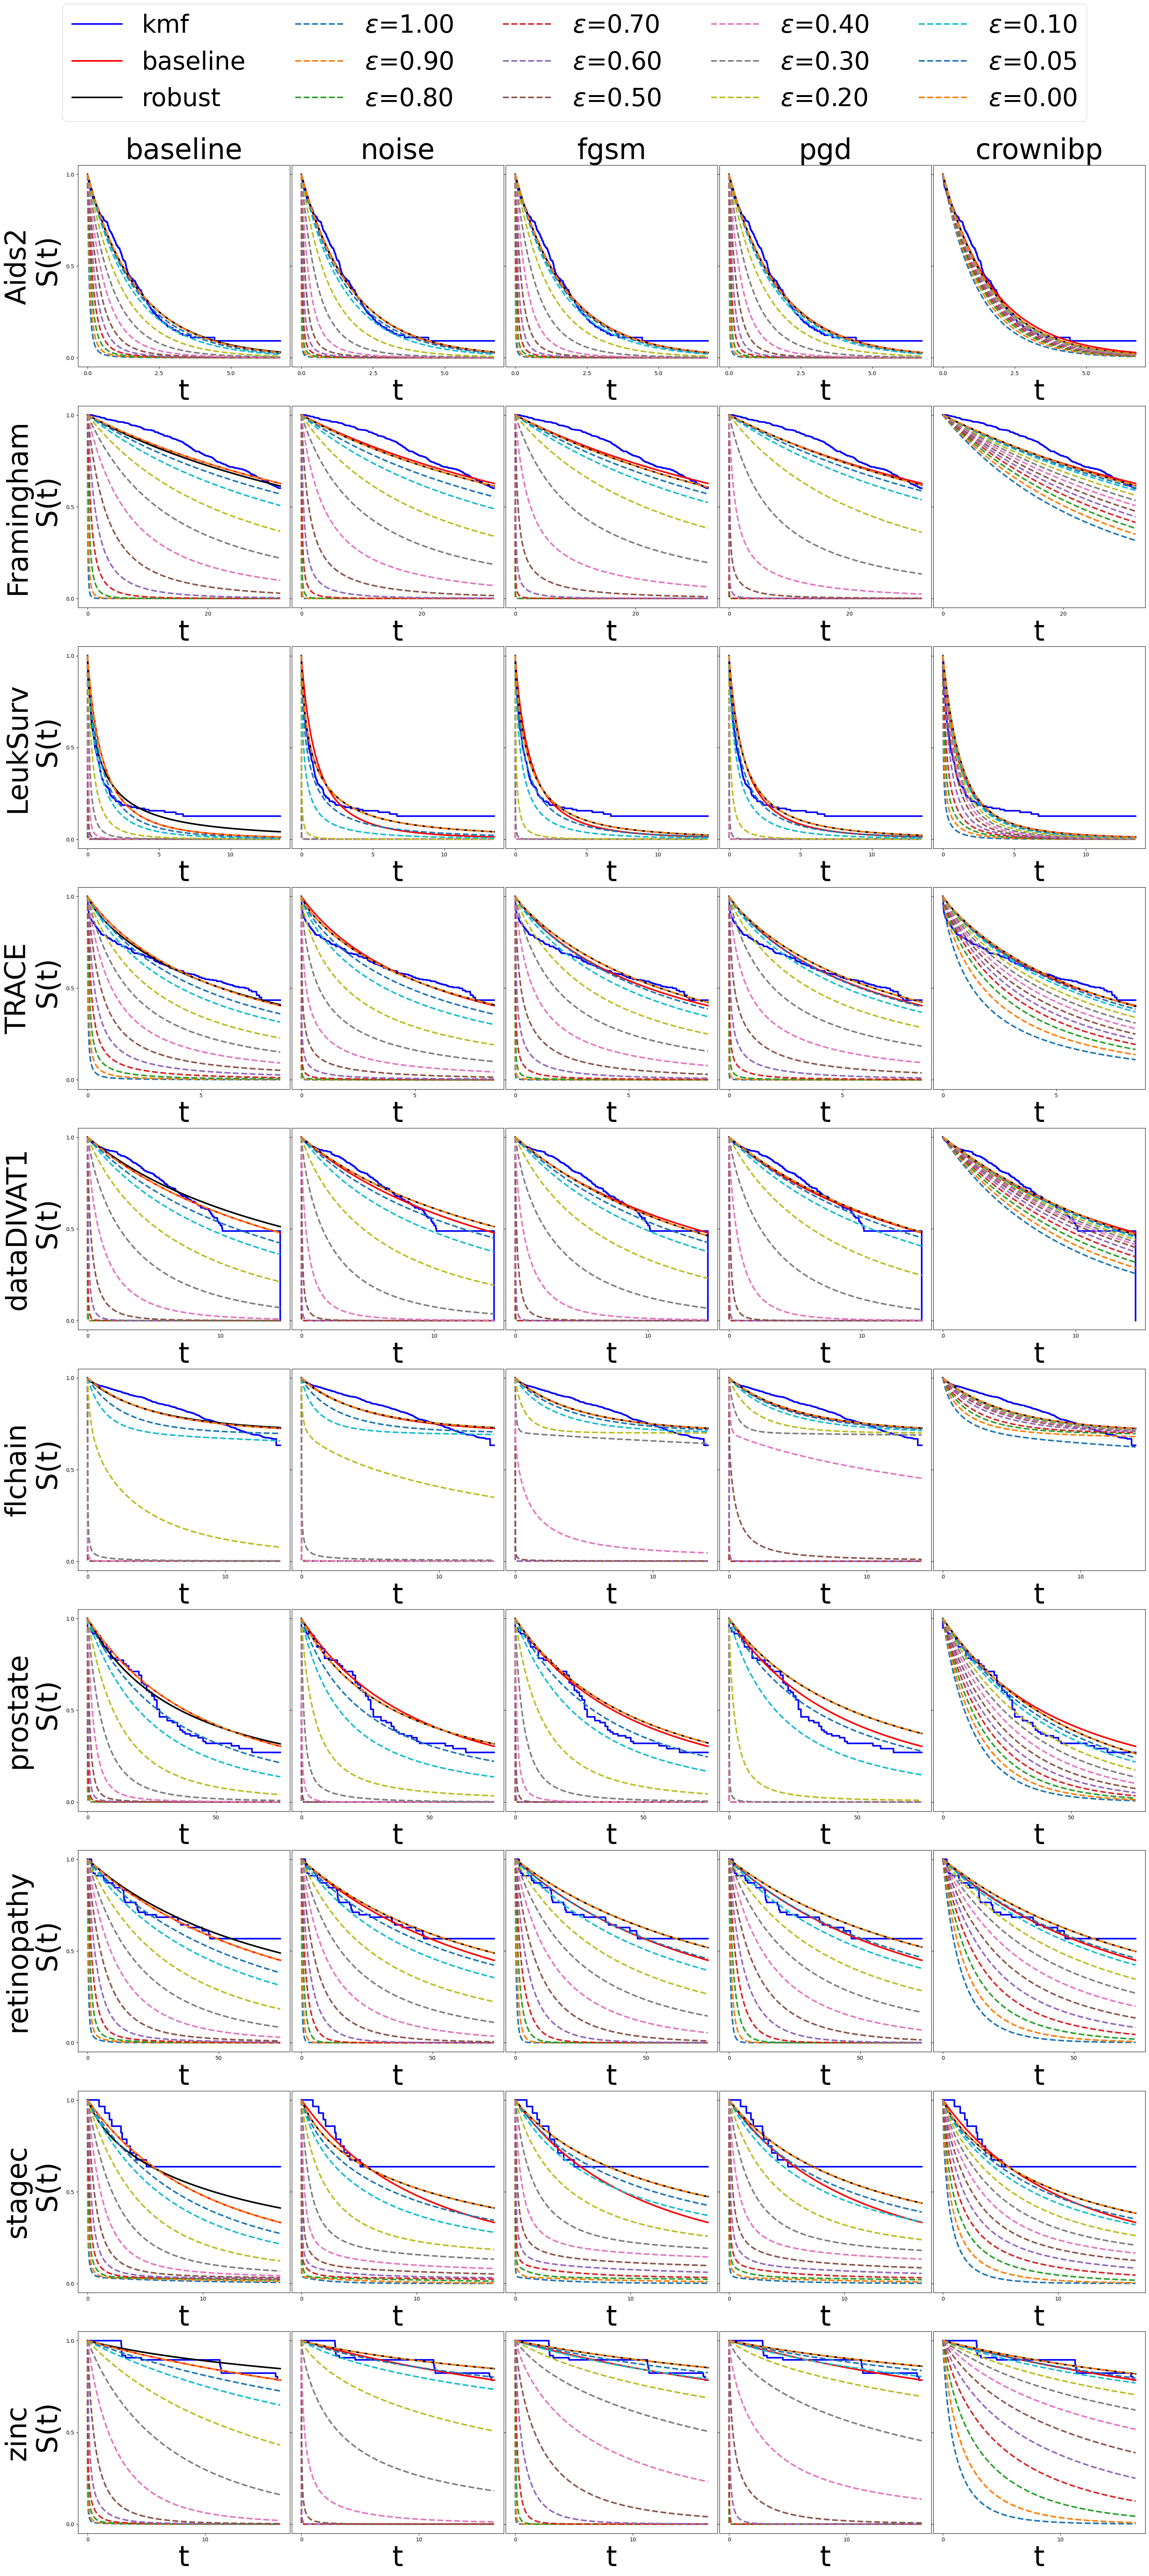

In [106]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves.pdf")

fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title


for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]

        # print(base_models)
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"{dataset}\n S(t)" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=5,fontsize=30,bbox_to_anchor=(.5,1.06),prop={'size':SMALL_SIZE//1.7}) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

In [ ]:
files[[-7,-2,-1],:]

In [ ]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)


SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        if dataset not in ["TRACE","stagec","zinc"]:
            continue
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]
        
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=6,fontsize=30,bbox_to_anchor=(.5,1.11),prop={'size':SMALL_SIZE}) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

### DIST PLOTS

In [107]:
# CI , IBS , NegLL
results_folder = fr"results\{attack}"
img_name = "curve_distributions_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [108]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [109]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves.pdf")

In [110]:
import seaborn as sns

In [111]:
fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title


for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"{dataset}\n S(t)" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)

labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.05),prop={'size':SMALL_SIZE}) 

plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_40532\2481826071.py:57: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


In [ ]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        axes[i][j+1].set_xlabel("t",fontsize=20)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.05)) 

plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()